In [1338]:
# tylko nowe cechy
# liczba nowych cech to połowa oryginalnych cech
# sqrt(n) zaokrąglony w góre
# klasyfikatory - zafiksowac sensowne ustawienia
# wagi sumowane do 1
# lecim po wszystkich zbiorach czemu nie
# k-fold cross validation
from multi_imbalance.datasets import load_datasets
import experiment as ex
from sklearn.model_selection import StratifiedKFold
from collections import Counter, defaultdict
from multi_imbalance.utils.metrics import gmean_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from utils import plot_embeddings
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [1339]:
datasets = load_datasets()

In [1340]:
ds_name = 'new_winequality-red'
test_on_all_folds = True

### One hot encoding for categorical columns

In [1341]:
pd.DataFrame(data=datasets[ds_name]['data']).apply(pd.Series.nunique)

0      96
1     143
2      80
3      91
4     153
5      60
6     144
7     436
8      89
9      96
10     65
dtype: int64

In [1342]:
datasets[ds_name]['data'].shape

(1599, 11)

In [1343]:
dt_name_to_cols_to_encode = {
    'cmc': [1,2,6,7],
    'dermatology': list(range(0,10)) + list(range(10,33)),
    'hayes-roth':[0,1,2,3],
    'new_vehicle': [],
    'new_yeast': [5],
    '1czysty-cut': [],
    '2delikatne-cut': [],
    '3mocniej-cut': [],
    '4delikatne-bezover-cut': [],
    'balance-scale': [0,1,2,3],
    'cleveland': [2,6,10,11,12],
    'cleveland_v2': [2, 6, 10, 11, 12],
    'glass': [],
    'new_ecoli': [],
    'new_led7digit': [],
    'new_winequality-red': [],
    'thyroid-newthyroid': []
}

In [1344]:
k = ds_name    
df = pd.DataFrame(data=datasets[k]['data'])
encoded = pd.get_dummies(df, columns=dt_name_to_cols_to_encode[ds_name], drop_first=True)

datasets[f"{k}_encoded"] = {'data': encoded.values, 'target': datasets[k]['target']}

In [1345]:
datasets[f'{ds_name}_encoded']['data'].shape

(1599, 11)

In [1346]:
config = ex.config_calculation_strategy2(datasets)

In [1348]:
#sane defaults - f1 was better with deeper net

config['cmc'] = {'nn_config': {'units_1st_layer': 17,
  'units_2nd_layer': 256,
  'units_3rd_layer': 128,
  'units_latent_layer': 4},
 'weighted_triplet_loss': True,
 'lr': 0.0001,
 'batch_size': 16,
 'gamma': 0.95,
 'epochs': 200}

config['dermatology'] = {'nn_config': {'units_1st_layer': 97,
   'units_2nd_layer': 512,
   'units_3rd_layer': 256,
   'units_latent_layer': 4},
  'weighted_triplet_loss': True,
  'lr': 0.0001,
  'batch_size': 16,
  'gamma': 0.95,
  'epochs': 200}

config['hayes-roth'] = {'nn_config': {'units_1st_layer': 11,
  'units_2nd_layer': 128,
  'units_3rd_layer': 64,
  'units_latent_layer': 4},
 'weighted_triplet_loss': True,
 'lr': 0.0001,
 'batch_size': 16,
 'gamma': 0.95,
 'epochs': 100}

config['new_vehicle'] = {'nn_config': {'units_1st_layer': 18,
  'units_2nd_layer': 256,
  'units_3rd_layer': 128,
  'units_latent_layer': 4},
 'weighted_triplet_loss': True,
 'lr': 0.0001,
 'batch_size': 16,
 'gamma': 0.95,
 'epochs': 200}

config['new_yeast'] = {'nn_config': {'units_1st_layer': 9,
  'units_2nd_layer': 256,
  'units_3rd_layer': 128,
  'units_latent_layer': 8},
 'weighted_triplet_loss': True,
 'lr': 0.0001,
 'batch_size': 16,
 'gamma': 0.95,
 'epochs': 100}

config['balance-scale'] = {'nn_config': {'units_1st_layer': 16,
  'units_2nd_layer': 128,
  'units_3rd_layer': 64,
  'units_latent_layer': 3},
 'weighted_triplet_loss': True,
 'lr': 0.0001,
 'batch_size': 16,
 'gamma': 0.95,
 'epochs': 100}

config['cleveland'] = {'nn_config': {'units_1st_layer': 24,
  'units_2nd_layer': 72,
  'units_3rd_layer': 48,
  'units_latent_layer': 12},
 'weighted_triplet_loss': True,
 'lr': 0.0001,
 'batch_size': 32,
 'gamma': 0.95,
 'epochs': 100}

config['cleveland_v2'] = {'nn_config': {'units_1st_layer': 23,
  'units_2nd_layer': 69,
  'units_3rd_layer': 46,
  'units_latent_layer': 11},
 'weighted_triplet_loss': True,
 'lr': 0.0001,
 'batch_size': 32,
 'gamma': 0.95,
 'epochs': 100}

config['glass'] = {'nn_config': {'units_1st_layer': 9,
  'units_2nd_layer': 27,
  'units_3rd_layer': 18,
  'units_latent_layer': 4},
 'weighted_triplet_loss': True,
 'lr': 0.0001,
 'batch_size': 32,
 'gamma': 0.95,
 'epochs': 100}

config['thyroid-newthyroid'] = {'nn_config': {'units_1st_layer': 5,
  'units_2nd_layer': 16,
  'units_3rd_layer': 10,
  'units_latent_layer': 4},
 'weighted_triplet_loss': True,
 'lr': 0.0001,
 'batch_size': 32,
 'gamma': 0.95,
 'epochs': 100}

config['new_ecoli'] = {'nn_config': {'units_1st_layer': 7,
  'units_2nd_layer': 21,
  'units_3rd_layer': 14,
  'units_latent_layer': 4},
 'weighted_triplet_loss': True,
 'lr': 0.0001,
 'batch_size': 32,
 'gamma': 0.95,
 'epochs': 100}

config['new_led7digit'] = {'nn_config': {'units_1st_layer': 7,
  'units_2nd_layer': 21,
  'units_3rd_layer': 14,
  'units_latent_layer': 4},
 'weighted_triplet_loss': True,
 'lr': 0.0001,
 'batch_size': 32,
 'gamma': 0.95,
 'epochs': 100}

config['new_winequality-red'] = {'nn_config': {'units_1st_layer': 11,
  'units_2nd_layer': 33,
  'units_3rd_layer': 22,
  'units_latent_layer': 5},
 'weighted_triplet_loss': True,
 'lr': 0.0001,
 'batch_size': 32,
 'gamma': 0.95,
 'epochs': 100}

In [1347]:
config[f"{ds_name}_encoded"]

{'nn_config': {'units_1st_layer': 11,
  'units_2nd_layer': 33,
  'units_3rd_layer': 22,
  'units_latent_layer': 5},
 'weighted_triplet_loss': True,
 'lr': 0.0001,
 'batch_size': 32,
 'gamma': 0.95,
 'epochs': 100}

In [1349]:
def instantiate_classifiers():
    classifiers = {
            "RF24": RandomForestClassifier(random_state=0, min_samples_leaf=2, min_samples_split=4, class_weight='balanced'),
            "DT": DecisionTreeClassifier(random_state=0, min_samples_split=4, min_samples_leaf=2, class_weight='balanced'),
            "KNN": KNeighborsClassifier(n_neighbors=1)
        } 
    return classifiers

new_winequality-red


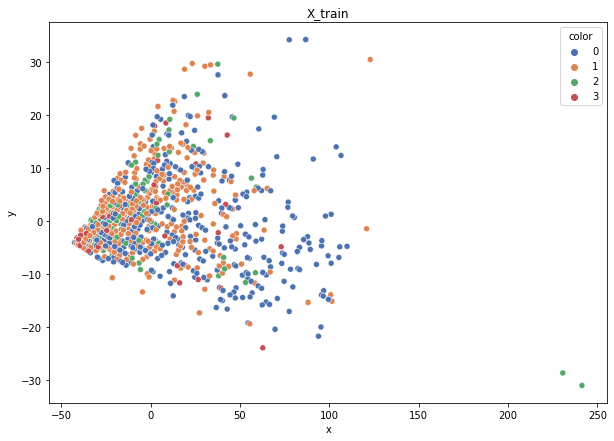

Class cardinalities: Counter({0: 545, 1: 510, 2: 159, 3: 65})
Weights: {0: 0.072041356277607, 1: 0.07698537092410943, 2: 0.24693420862450194, 3: 0.6040390641737817}


100%|██████████| 320/320 [00:00<00:00, 3425.98it/s]


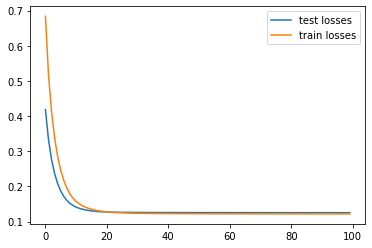

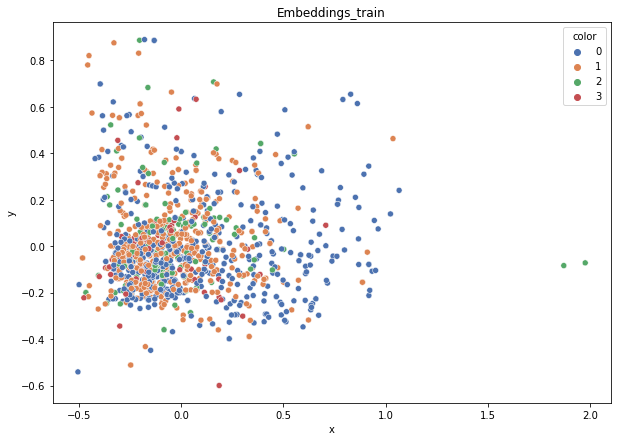

DT-f1-new-features: 0.428
DT-f1-old+new-features: 0.488
DT-f1-old-features: 0.503
DT-gmean-new-features: 0.371
DT-gmean-old+new-features: 0.461
DT-gmean-old-features: 0.479
KNN-f1-new-features: 0.504
KNN-f1-old+new-features: 0.486
KNN-f1-old-features: 0.486
KNN-gmean-new-features: 0.411
KNN-gmean-old+new-features: 0.431
KNN-gmean-old-features: 0.431
RF24-f1-new-features: 0.547
RF24-f1-old+new-features: 0.589
RF24-f1-old-features: 0.556
RF24-gmean-new-features: 0.431
RF24-gmean-old+new-features: 0.46
RF24-gmean-old-features: 0.435


In [1350]:
result_dict = defaultdict(list)

for dataset_name in [ds_name]:
# for dataset_name in list(datasets.keys()):
    print(dataset_name)
    result_dict["dataset"].append(dataset_name)
    fold_result_dict = defaultdict(list)

    X, y = datasets[dataset_name]['data'], datasets[dataset_name]['target']
    X_encoded, y = datasets[f"{dataset_name}_encoded"]['data'], datasets[f"{dataset_name}_encoded"]['target']
    
    skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
    n_splits = skf.get_n_splits(X, y)
    
    folds = []
    if test_on_all_folds:
        folds = skf.split(X, y)
    else:
        folds = list(skf.split(X, y))[1:2]
        
    for train_index, test_index in folds:
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        X_train_enc, X_test_enc = X_encoded[train_index], X_encoded[test_index]
        
        # PCA X_train
        pca = PCA(n_components=2)
        plot_embeddings(pca.fit_transform(X_train), y_train)
        plt.title("X_train")
        plt.show()
        
        weights = ex.weights_calculation_strategy1(X_train, y_train)
        cfg =  config[dataset_name]
        # pretrain ANN triplets
        embeddings_train, embeddings_test = ex.train_triplets(X_train_enc, y_train, X_test_enc, y_test, weights,cfg)
        
        # PCA embeddings_train
        pca = PCA(n_components=2)
        plot_embeddings(pca.fit_transform(embeddings_train), y_train)
        plt.title("Embeddings_train")
        plt.show()
        
        X_train_new = np.hstack([X_train, embeddings_train])
        X_test_new = np.hstack([X_test, embeddings_test])
        
        classifiers = instantiate_classifiers()
        for clf_name, clf in classifiers.items():
            clf.fit(X_train, y_train)
            preds = clf.predict(X_test)

            gmean = gmean_score(y_test, preds)
            f1 = f1_score(y_test, preds, average='macro')
            fold_result_dict[f"{clf_name}-f1-old-features"].append(f1)
            fold_result_dict[f"{clf_name}-gmean-old-features"].append(gmean)
            
        classifiers = instantiate_classifiers()
        for clf_name, clf in classifiers.items():
            clf.fit(X_train_new, y_train)
            preds = clf.predict(X_test_new)

            gmean = gmean_score(y_test, preds)
            f1 = f1_score(y_test, preds, average='macro')
            fold_result_dict[f"{clf_name}-f1-old+new-features"].append(f1)
            fold_result_dict[f"{clf_name}-gmean-old+new-features"].append(gmean)
            
        classifiers = instantiate_classifiers()
        for clf_name, clf in classifiers.items():
            clf.fit(embeddings_train, y_train)
            preds = clf.predict(embeddings_test)

            gmean = gmean_score(y_test, preds)
            f1 = f1_score(y_test, preds, average='macro')
            fold_result_dict[f"{clf_name}-f1-new-features"].append(f1)
            fold_result_dict[f"{clf_name}-gmean-new-features"].append(gmean)
        for key in sorted(list(fold_result_dict.keys())):
            print(f"{key}: {np.round(fold_result_dict[key][-1],3)}")
            
    for k in fold_result_dict:
        result_dict[k].append(np.mean(fold_result_dict[k]))

In [1351]:
results_df = pd.DataFrame.from_dict(result_dict)

In [1352]:
results_df

,dataset,RF24-f1-old-features,RF24-gmean-old-features,DT-f1-old-features,DT-gmean-old-features,KNN-f1-old-features,KNN-gmean-old-features,RF24-f1-old+new-features,RF24-gmean-old+new-features,DT-f1-old+new-features,DT-gmean-old+new-features,KNN-f1-old+new-features,KNN-gmean-old+new-features,RF24-f1-new-features,RF24-gmean-new-features,DT-f1-new-features,DT-gmean-new-features,KNN-f1-new-features,KNN-gmean-new-features
0,new_winequality-red,0.555713,0.435285,0.502662,0.478825,0.486295,0.431499,0.588515,0.459585,0.488289,0.461329,0.486295,0.431499,0.547081,0.431009,0.428266,0.37073,0.503664,0.410604


In [1353]:
results_df.filter(regex=("dataset|RF24-f1*"))

,dataset,RF24-f1-old-features,RF24-f1-old+new-features,RF24-f1-new-features
0,new_winequality-red,0.555713,0.588515,0.547081


In [1354]:
results_df.filter(regex=("dataset|RF24-gmean*"))

,dataset,RF24-gmean-old-features,RF24-gmean-old+new-features,RF24-gmean-new-features
0,new_winequality-red,0.435285,0.459585,0.431009


In [1355]:
results_df.filter(regex=("dataset|DT-f1*"))

,dataset,DT-f1-old-features,DT-f1-old+new-features,DT-f1-new-features
0,new_winequality-red,0.502662,0.488289,0.428266


In [1356]:
results_df.filter(regex=("dataset|DT-gmean*"))

,dataset,DT-gmean-old-features,DT-gmean-old+new-features,DT-gmean-new-features
0,new_winequality-red,0.478825,0.461329,0.37073


In [1357]:
results_df.filter(regex=("dataset|KNN-f1*"))

,dataset,KNN-f1-old-features,KNN-f1-old+new-features,KNN-f1-new-features
0,new_winequality-red,0.486295,0.486295,0.503664


In [1358]:
results_df.filter(regex=("dataset|KNN-gmean*"))

,dataset,KNN-gmean-old-features,KNN-gmean-old+new-features,KNN-gmean-new-features
0,new_winequality-red,0.431499,0.431499,0.410604
